# Modeling: 

## Gradient Boosting Regression

![Modeling](https://user-images.githubusercontent.com/67468718/111879997-1bbd6a80-8966-11eb-92c1-01c38cbdbe4a.JPG)



## Contents<a id='Contents'></a>
 * [1. Introduction](#1_Introduction)
 * [2. Sourcing and Loading](#2_Sourcing_and_Loading)
    * [2.1 Import relevant libraries](#2.1_Import_relevant_libraries)
    * [2.2 Load the data](#2.2_Load_the_data)
 * [3. View and Visualize our dependent variable 'price'](#3._View_and_Visualize_our_dependent_variable_price)
    * [3.1 View the data](#3.1_View_the_data)
    * [3.2 Final Visualization of our dependent Variable 'price'](#3.2_Final_Visualization_of_our_dependent_variable_price)
 * [4. Features Selection: Define/Select Features](#4_Features_Selection:_Define_Select_Features)
 * [5. Train/Test Split](#5_Train/Test_Split)
 * [6. Scaling and Transformation: Standardization](#6_Scaling_and_Transformation:_Standardization)
 * [7. Modeling: Gradient Boosting Regression](#7_Gradient_Boosting_Regression)
    * [7.1 Fitting Gradient Boosting Regression](#7.1_Fitting_Gradient_Boosting_Regression)
    * [7.2 Gradient Boosting Regression: Residuals Visualization](#7.2_Gradient_Boosting_Regression:_Residuals_Visualization)
    * [7.3 Gradient Boosting Regression Model Evaluation](#7.3_Gradient_Boosting_Regression_Model_Evaluation)
    * [7.4 Features Selection](#7.4_Features_Selection)
       * [7.4.1 Features Importance](#7.4.1_Features_Importance)
       * [7.4.2 Keeping only 'price_per_sqft' and 'sqft'](#7.4.2_Keeping_only_price_per_sqft_and_sqft)
       * [7.4.3 Keeping 'price_per_sqft', 'sqft', 'median_income', 'property_type' and 'school_rating'](#7.4.3_Keeping_price_per_sqft_sqft_median_income_property_type_school_rating)    
       * [7.4.4 Features Selection Summary](#7.4.4_Features_Selection_Summary)    
    * [7.5 Hyperparameters Tuning: GridSearchCV](#7.5_Hyperparameters_Tuning:_GridSearchCV)
       * [7.5.1 GridSearchCV for all features](#7.5.1_GridSearchCV_for_all_features)
       * [7.5.2 Fitting Gradient Boosting Regression after GridsearchCV (All features)](#7.5.2_Fitting_Gradient_Boosting_Regression_after_GridsearchCV_(All_features))
       * [7.5.3 GridSearchCV for most important features: 'sqft' and 'price_per_sqft'](#7.5.3_GridSearchCV_for_most_important_features:_sqft_and_price_per_sqft)
       * [7.5.4 Fitting Gradient Boosting Regression after GridsearchCV (most important features)](#7.5.4_Fitting_Gradient_Boosting_Regression_after_GridsearchCV_(most_important_features))
       * [7.5.5 GridSearchCV for most important features: 'sqft', 'price_per_sqft', 'property_type', 'school_rating' and 'median_income'](#7.5.5_GridSearchCV_for_most_important_features:_sqft_and_price_per_sqft_property_type_school_rating_median_income)
       * [7.5.6 Fitting Gradient Boosting Regression after GridsearchCV (Top-5 Features)](#7.5.6_Fitting_Gradient_Boosting_Regression_after_GridsearchCV_(Top-5_Features))
 * [8. Gradient Boosting Regression Tuning Summary](#8_Gradient_Boosting_Regression_Tuning_Summary)
 * [9. Gradient Boosting Regression Actual vs Prediction Visualization](#9_Gradient_Boosting_Regression_Actual_vs_Prediction_Visualization)
 * [10. Models next step](#10_Models_next_step)

## 1. Introduction<a id='1_Introduction'></a>

Here comes the really fun step: modeling! For this step, we'll be:
 * Training multiple Regression algorithms.
 * Apply hyperparameters tuning where applicable to ensure every algorithm will result in best prediction possible.
 * Finally, evaluate these Models.

**Regression Models:**
 * Linear Regression (Baseline Model).
 * Ridge Regression (L2 Regularization)
 * Lasso Regression (L1 Regularization)
 * Decision Trees
 * Random Forests
 * GB
 * XGBoost
 * Support Vector Regression
 * Stacking
 * Neural networks.
 
 
 **In This Notebook, We'll be using Gradient Boosting**



## 2. Sourcing and Loading<a id='2_Sourcing_and_Loading'></a> 

### 2.1 Import relevant libraries<a id='2.1_Import_relevant_libraries'></a> 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os 

plt.style.use('ggplot')

print('***Libraries are imported***')

***Libraries are imported***


### 2.2 Load the data<a id='2.2_Load_the_data'></a>

In [ ]:
# Check Current Directory:
os.getcwd()

In [5]:
# Changing the directory:
os.chdir(r"path/Feature_Engineering/datasets")

In [ ]:
#Confirm the directory:
os.getcwd()

In [7]:
# List files/folders in the cd:
os.listdir()

['pre_processing_df.csv']

In [8]:
df = pd.read_csv('pre_processing_df.csv')

## 3. View and Visualize our dependent variable 'price'<a id='3._View_and_Visualize_our_dependent_variable_price'></a>

### 3.1 View the data<a id='3.1_View_the_data'></a>

In [9]:
#Let's check the df shape:
structure = df.shape
print("Final DataFrame 'df' has Rows:", structure[0], "and Columns: ", structure[1])

Final DataFrame 'df' has Rows: 7484 and Columns:  23


In [10]:
#Let's check the df shape:
df.head()

,property_type,zipcode,price,beds,baths,sqft,lot_size,days_on_market,price_per_sqft,hoa_month,...,median_income,hotness_score,supply_score,demand_score,university_count,barts,malls,universities,bedBath,AvgRoomSize
0,1,94568,905000,3,4,1994,0,80,454,388.0,...,119637,83.72,94.25,73.19,0,1,0,0,12,284.857
1,2,94566,645000,2,2,1221,1237,143,528,379.0,...,126782,80.07,79.57,80.57,0,0,1,0,4,305.250
2,1,94588,940000,4,2,1928,2660,148,488,470.0,...,134451,85.91,87.06,84.76,0,1,1,0,8,321.333
3,0,94588,1036000,3,2,1355,7708,66,765,33.0,...,134451,85.91,87.06,84.76,0,1,1,0,6,271.000
4,0,94568,1250000,4,4,3083,3058,143,405,232.0,...,119637,83.72,94.25,73.19,0,1,0,0,16,385.375


In [11]:
# Summary Statistics:
df.describe()['price'].round(2)

count       7484.00
mean      887769.19
std       387091.45
min       165000.00
25%       590000.00
50%       808000.00
75%      1150000.00
max      1955000.00
Name: price, dtype: float64

### 3.2 Final Visualization of our dependent Variable 'price'<a id='3.2_Final_Visualization_of_our_dependent_variable_price'></a>

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


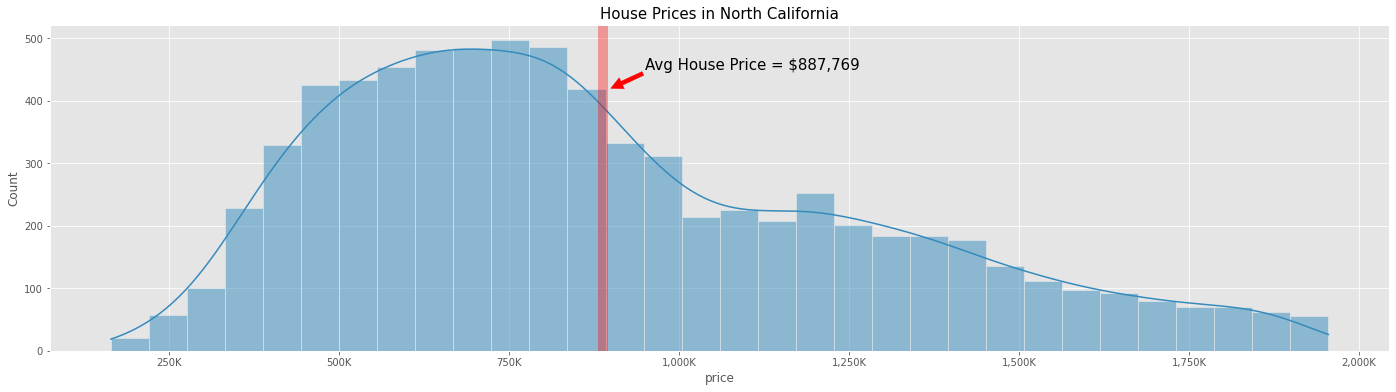

In [12]:
# Making a histogram of the price variable and adding average house sale:
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df['price'], kde=True)
ax.axvline(df['price'].mean(), color='red', ls='-', alpha=0.35, lw=10)
plt.annotate('Avg House Price = $887,769', xy=(900000, 420), xytext=(950000, 450), arrowprops={'color':'red'}, fontsize=15)
ax.set_title('House Prices in North California', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

## 4. Features Selection: Define/Select Features<a id='4_Features_Selection:_Define/Select_Features'></a>


In [13]:
# let's check our final df columns:
df.columns

Index(['property_type', 'zipcode', 'price', 'beds', 'baths', 'sqft',
       'lot_size', 'days_on_market', 'price_per_sqft', 'hoa_month',
       'property_age', 'school_rating', 'school_count', 'median_income',
       'hotness_score', 'supply_score', 'demand_score', 'university_count',
       'barts', 'malls', 'universities', 'bedBath', 'AvgRoomSize'],
      dtype='object')

In [14]:
# Let's define/select our features:
features = ['property_type', 'zipcode', 'beds', 'baths', 'sqft','lot_size', 
            'days_on_market', 'price_per_sqft', 'hoa_month','property_age', 
            'school_rating', 'school_count', 'median_income','hotness_score', 
            'supply_score', 'demand_score', 'university_count','barts', 'malls', 
            'universities', 'bedBath', 'AvgRoomSize']

# And, Now let's define X and y:
X = df[features]
y = df.price

## 5. Train/Test Split<a id='5_Train/Test_Split'></a>

Now, let's split our data (X) into training and testing splits, without letting a model learn anything about the test split.

let's have 75/25 Train/Test split

In [15]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

## 6. Scaling and Transformation: Standardization<a id='6_Scaling_and_Transformation:_Standardization'></a>

**Standardization** finds the mean of our data and centers the distribution around it, calculating the number of standard deviations away from the mean each point is. The number of standard deviations are then used as our new values. This centers the data around 0 but technically has no limit to the maximum and minimum values.



In [16]:
# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))


## 7. Modeling: Gradient Boosting Regression<a id='7_Gradient_Boosting_Regression'></a>

**Gradient Boosting** is an ensemble technique that takes an iterative approach to combining weak learners to create a strong learner by focusing on mistakes of prior iterations.

**Trade-Offs of Gradient Boosting:**
  * **Pros**:
    * Extremely powerful on both classification and regression tasks.
    * More accurate predictions compared to random forests.
    * Accepts various types of inputs
    * Outputs feature importance
  * **Cons**:
    * Longer to train (Cannot parallelize).
    * May overfit if too many trees are used (n_estimators)
    * More difficult to properly tune (Requires careful tuning of hyperparameters)
    * Sensitive to outliers


### 7.1 Fitting  Gradient Boosting Regression<a id='7.1_Fitting_Gradient_Boosting_Regression'></a>


In [17]:
# Import necessary modules
from sklearn.ensemble import GradientBoostingRegressor

# Create a GradientBoostingRegressor: gbr
# Default: max_depth=3, n_estimators=100 and learning_rate=0.1
gbr = GradientBoostingRegressor(random_state=1981) 

# Fit the regressor to the training data
gbr.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient : {:.4f}".format(gbr.score(X_test, y_test) * 100), '%')

R-Squared coefficient : 99.1028 %


Base Gradient Boosting Regression R-Squared coefficient is 99.1028% which is clearly lower than Random Forests Regression 99.6786 %.

In [18]:
# Predict on the test data: y_pred_gbr
y_pred_gbr = gbr.predict(X_test)

### 7.2 Gradient Boosting Regression: Residuals Visualization<a id='7.2_Gradient_Boosting_Regression:_Residuals_Visualization'></a>

C:\Users\aktha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

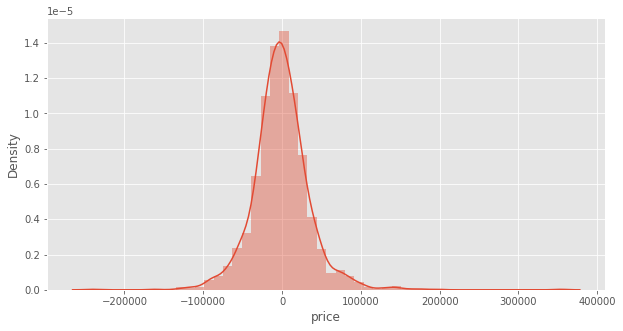

In [19]:
# visualizing residuals
fig = plt.figure(figsize=(10, 5))
residuals = (y_test-y_pred_gbr)
sns.distplot(residuals)

As we can see above by visualizing the residual we can see that is normally distributed which is a good indication that we're having a linear relationship with our dependent variable 'price'.

### 7.3 Gradient Boosting Regression Model Evaluation<a id='7.3_Gradient_Boosting_Regression_Model_Evaluation'></a>

In [20]:
from sklearn import metrics

print("********Gradient Boosting Regression Model Evaluation********")
print("-------------------------------------------------")
print("Gradient Boosting Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_gbr) * 100), '%')
print("-------------------------------------------------")
print("Gradient Boosting Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_gbr)))
print("-------------------------------------------------")
print("Gradient Boosting Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_gbr)))
print("-------------------------------------------------")
print("Gradient Boosting Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr))))
print("-------------------------------------------------")
print("Gradient Boosting Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_gbr) * 100), '%')
print("-------------------------------------------------")

********Gradient Boosting Regression Model Evaluation********
-------------------------------------------------
Gradient Boosting Regression - r2 Score: 99.1028 %
-------------------------------------------------
Gradient Boosting Regression - MAE: 25714.0701
-------------------------------------------------
Gradient Boosting Regression - MSE:1325687350.4870
-------------------------------------------------
Gradient Boosting Regression - RMSE:36409.9897
-------------------------------------------------
Gradient Boosting Regression - Variance Score:99.1037 %
-------------------------------------------------


As we can see, the value of **root mean squared error (RMSE) is 36,409.9897**, which is slightly less than 5% of the mean value of the Sales Price i.e.  $887,769.19. also, we have very good variance score at 99.1037%. 

This mean that our base Gradient Boosting Regression Model is performing well behind Random Forests Regression Model.


### 7.4 Features Selection<a id='7.4_Features_Selection'></a>

As shown below let's try to improve predictions by keeping high importants features only: 

#### 7.4.1 Features Importance<a id='7.4.1_Features_Importance'></a> 


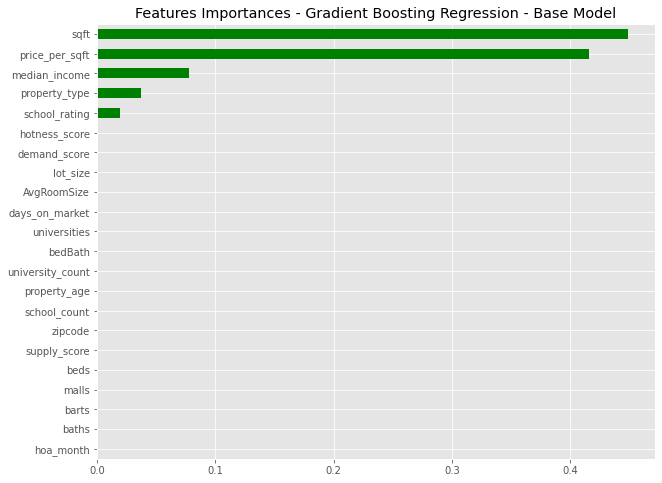

In [21]:
# First, let's create a pd.Series of features importances
importances_gbr = pd.Series(data=gbr.feature_importances_, index=X.columns)

# Sort importances
importances_sorted = importances_gbr.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(10, 8))
importances_sorted.plot(kind='barh', color='green')
plt.title('Features Importances - Gradient Boosting Regression - Base Model')
plt.grid(True)
plt.show()

**Dropping Features:**
 * As shown above, the high important features are only: 'price_per_sqft' and 'sqft' so as a first step let's keep them and drop the remaining features.
 * Second, let's keep  'price_per_sqft', 'sqft', 'median_income', 'property_type' and'school_rating'.

 
#### 7.4.2 Keeping only 'price_per_sqft' and 'sqft'<a id='7.4.2_Keeping_only_price_per_sqft_and_sqft'></a> 

In [22]:
# So Now, Let's re define/select our features and keep only high Coefficients:
# let's keep only  'sqft', 'price_per_sqft':
features = ['sqft', 'price_per_sqft']

# And, Now let's define X and y:
X = df[features]
y = df.price

In [23]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

In [24]:
# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [25]:
# Create a GradientBoostingRegressor: gbr_2
# Default: max_depth=3, n_estimators=100 and learning_rate=0.1
gbr_2 = GradientBoostingRegressor(random_state=1981) 

# Fit the regressor to the training data
gbr_2.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient : {:.4f}".format(gbr_2.score(X_test, y_test) * 100), '%')

# Predict on the test data: y_pred_gbr_2
y_pred_gbr_2 = gbr_2.predict(X_test)

R-Squared coefficient : 99.2931 %


In [26]:
print("********Tuned Gradient Boosting Regression Model Evaluation********")
print("-------------------------------------------------------")
print("Tuned Gradient Boosting Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_gbr_2) * 100), '%')
print("-------------------------------------------------------")
print("Tuned Gradient Boosting Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_gbr_2)))
print("-------------------------------------------------------")
print("Tuned Gradient Boosting Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_gbr_2)))
print("-------------------------------------------------------")
print("Tuned Gradient Boosting Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr_2))))
print("-------------------------------------------------------")
print("Tuned Gradient Boosting Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_gbr_2) * 100), '%')
print("-------------------------------------------------------")

********Tuned Gradient Boosting Regression Model Evaluation********
-------------------------------------------------------
Tuned Gradient Boosting Regression - r2 Score: 99.2931 %
-------------------------------------------------------
Tuned Gradient Boosting Regression - MAE: 21855.3031
-------------------------------------------------------
Tuned Gradient Boosting Regression - MSE:1044412302.2215
-------------------------------------------------------
Tuned Gradient Boosting Regression - RMSE:32317.3684
-------------------------------------------------------
Tuned Gradient Boosting Regression - Variance Score:99.2935 %
-------------------------------------------------------


#### 7.4.3 Keeping 'price_per_sqft', 'sqft', 'median_income', 'property_type' and 'school_rating'<a id='7.4.3_Keeping_price_per_sqft_sqft_median_income_property_type_school_rating'></a> 

In [27]:
df.columns

Index(['property_type', 'zipcode', 'price', 'beds', 'baths', 'sqft',
       'lot_size', 'days_on_market', 'price_per_sqft', 'hoa_month',
       'property_age', 'school_rating', 'school_count', 'median_income',
       'hotness_score', 'supply_score', 'demand_score', 'university_count',
       'barts', 'malls', 'universities', 'bedBath', 'AvgRoomSize'],
      dtype='object')

In [28]:
# So Now, Let's re define/select our features and keep only high Coefficients:
# let's keep only  'price_per_sqft', 'sqft', 'median_income', 'property_type' and 'school_rating':
features = ['sqft', 'price_per_sqft', 'property_type', 
            'school_rating', 'median_income']

# And, Now let's define X and y:
X = df[features]
y = df.price

In [29]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

In [30]:
# Create a GradientBoostingRegressor: gbr_5
# Default: max_depth=3, n_estimators=100 and learning_rate=0.1
gbr_5 = GradientBoostingRegressor(random_state=1981) 

# Fit the regressor to the training data
gbr_5.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient : {:.4f}".format(gbr_5.score(X_test, y_test) * 100), '%')

# Predict on the test data: y_pred_gbr_5
y_pred_gbr_5 = gbr_5.predict(X_test)

R-Squared coefficient : 99.1533 %


In [31]:
print("********Tuned_5 Gradient Boosting Regression Model Evaluation********")
print("-------------------------------------------------------")
print("Tuned_5 Gradient Boosting Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_gbr_5) * 100), '%')
print("-------------------------------------------------------")
print("Tuned_5 Gradient Boosting Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_gbr_5)))
print("-------------------------------------------------------")
print("Tuned_5 Gradient Boosting Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_gbr_5)))
print("-------------------------------------------------------")
print("Tuned_5 Gradient Boosting Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr_5))))
print("-------------------------------------------------------")
print("Tuned_5 Gradient Boosting Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_gbr_5) * 100), '%')
print("-------------------------------------------------------")

********Tuned_5 Gradient Boosting Regression Model Evaluation********
-------------------------------------------------------
Tuned_5 Gradient Boosting Regression - r2 Score: 99.1533 %
-------------------------------------------------------
Tuned_5 Gradient Boosting Regression - MAE: 25029.8448
-------------------------------------------------------
Tuned_5 Gradient Boosting Regression - MSE:1250998959.6480
-------------------------------------------------------
Tuned_5 Gradient Boosting Regression - RMSE:35369.4637
-------------------------------------------------------
Tuned_5 Gradient Boosting Regression - Variance Score:99.1542 %
-------------------------------------------------------


#### 7.4.4 Features Selection Summary<a id='7.4.4_Features_Selection_Summary'></a>

As we can see below, when we're keeping 2 features ('sqft', 'price_per_sqft'): we're seeing the best Result for Gradient Boosting Regression:

|Features Selection| r2 Score|    MAE  | MSE  | RMSE|Variance Score|
|:----------------------|:-------:|:-------:|:----:|:----:|:----:|
|Baseline (all features)|99.1028 %|25714.0701|1325687350.4870|36409.9897|99.1037 %|
|Keeping 2 features (Most Important)    |99.2931 %|21855.3031|1044412302.2215|32317.3684|99.2935 %|
|Keeping 5 features    |99.1533 %|25029.8448|1250998959.6480|35369.4637|99.1542 %|

### 7.5 Hyperparameters Tuning: GridSearchCV<a id='7.5_Hyperparameters_Tuning:_GridSearchCV'></a>

#### 7.5.1 GridSearchCV for all features:<a id='7.5.1_GridSearchCV_for_all_features'></a>

In [32]:
# Let's define/select our features:
features = ['property_type', 'zipcode', 'beds', 'baths', 'sqft', 'lot_size', 
            'days_on_market', 'price_per_sqft', 'hoa_month', 'property_age', 
            'school_rating', 'school_count', 'median_income', 'hotness_score', 
            'supply_score', 'demand_score', 'university_count', 'barts', 
            'malls', 'universities', 'bedBath', 'AvgRoomSize']

# And, Now let's define X and y:
X = df[features]
y = df.price

# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [33]:
print(dir(GradientBoostingRegressor))
print(GradientBoostingRegressor())

['_SUPPORTED_LOSS', '__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_initialized', '_check_n_features', '_check_params', '_clear_state', '_compute_partial_dependence_recursion', '_estimator_type', '_fit_stage', '_fit_stages', '_get_param_names', '_get_tags', '_init_state', '_is_initialized', '_make_estimator', '_more_tags', '_raw_predict', '_raw_predict_init', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_resize_state', '_staged_raw_predict', '_validate_data', '_validate_estimator', '_validate_y', '_warn_mae_for_criterion', 'apply

In [ ]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV

n_est = [3000, 4000, 5000, 6000]
max_depth = [3, 7, 11]
#lr = [0.01, 0.1, 1] 


# Set the parameters by cross-validation
#params = [{'n_estimators': n_est,'max_depth': max_depth,'learning_rate': lr }]

params = [{'n_estimators': n_est,
          'max_depth': max_depth}]

# Create a GradientBoostingRegressor: gbr_search_1
gbr_search_1 = GradientBoostingRegressor(random_state=1981) 

#cross validation
folds = 5

# Setup the GridSearchCV object: gbr_cv_all
gbr_cv_all = GridSearchCV(estimator = gbr_search_1, 
                          param_grid = params, 
                          scoring= 'r2', 
                          cv = folds, n_jobs=-1,
                          return_train_score=True,
                          verbose = 1)   

# Fit it to the training data
gbr_cv_all.fit(X_train, y_train)



In [ ]:
#checking the value of optimum number of parameters
print("Tuned Gradient Boosting Regression Parameters: {}".format(gbr_cv_all.best_params_))
print("Tuned Gradient Boosting - Best r2 Score is {:.4f}".format(gbr_cv_all.best_score_ * 100), "%")

In [ ]:
cv_results = pd.DataFrame(gbr_cv_all.cv_results_)
cv_results

In [ ]:
# plotting mean test and train scores with max_depth: 
cv_results['param_max_depth'] = cv_results['param_max_depth'].astype('int32')
plt.figure(figsize=(16,5))

# plotting r2 score vs n_estimators:
plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.axvline(7, color='black', ls='--', lw=2, label='max_depth=7')
plt.xlabel('max_depth')
plt.ylabel('r2 Score')
plt.title("r2 Score and max_depth")
plt.legend(['train score', 'test score', 'max_depth=10'], loc='upper right')
plt.show()

#### 7.5.2 Fitting Gradient Boosting Regression after GridsearchCV (All features)<a id='7.5.2_Fitting_Gradient_Boosting_Regression_after_GridsearchCV_(All_features)'></a>

In [35]:
# Create a GradientBoostingRegressor: gbr_tuned_cv_1

#(Best GridsearchCV)
max_depth = 7 
n_estimators = 3000
learning_rate = 0.01

gbr_tuned_cv_1 = GradientBoostingRegressor(max_depth = max_depth,
                                           n_estimators = n_estimators,
                                           learning_rate = learning_rate,
                                           random_state=1981)

# Fit the regressor to the training data
gbr_tuned_cv_1.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient Tuned_final : {:.4f}".format(gbr_tuned_cv_1.score(X_test, y_test) * 100), '%')


# Predict on the test data: y_pred_gbr_cv_1
y_pred_gbr_cv_1 = gbr_tuned_cv_1.predict(X_test)


R-Squared coefficient Tuned_final : 99.6985 %


In [36]:
print("********Tuned Gradient Boosting Regression Model Evaluation********")
print("-------------------------------------------------------------")
print("Tuned Gradient Boosting Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_gbr_cv_1) * 100), '%')
print("-------------------------------------------------------------")
print("Tuned Gradient Boosting Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_gbr_cv_1)))
print("-------------------------------------------------------------")
print("Tuned Gradient Boosting Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_gbr_cv_1)))
print("-------------------------------------------------------------")
print("Tuned Gradient Boosting Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr_cv_1))))
print("-------------------------------------------------------------")
print("Tuned Gradient Boosting Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_gbr_cv_1) * 100), '%')
print("-------------------------------------------------------------")

********Tuned Gradient Boosting Regression Model Evaluation********
-------------------------------------------------------------
Tuned Gradient Boosting Regression - r2 Score: 99.6985 %
-------------------------------------------------------------
Tuned Gradient Boosting Regression - MAE: 9475.0267
-------------------------------------------------------------
Tuned Gradient Boosting Regression - MSE:445480220.4043
-------------------------------------------------------------
Tuned Gradient Boosting Regression - RMSE:21106.4024
-------------------------------------------------------------
Tuned Gradient Boosting Regression - Variance Score:99.6986 %
-------------------------------------------------------------


#### 7.5.3 GridSearchCV for most important features: 'sqft' and 'price_per_sqft'<a id='7.5.3_GridSearchCV_for_most_important_features:_sqft_and_price_per_sqft'></a> 

In [37]:
# Let's define/select our features:
features = ['sqft',  'price_per_sqft']

# And, Now let's define X and y:
X = df[features]
y = df.price

# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [ ]:
n_est = [3000, 4000, 5000, 6000]
max_depth = [3, 7, 11]
lr = [0.01, 0.1, 1]


# Set the parameters by cross-validation
params = [{'n_estimators': n_est,
          'max_depth': max_depth,
          'learning_rate': lr }]

# Create a GradientBoostingRegressor: gbr_search_2
gbr_search_2 = GradientBoostingRegressor(random_state=1981) 

#cross validation
folds = 5

# Setup the GridSearchCV object: gbr_cv_all
gbr_cv_2 = GridSearchCV(estimator = gbr_search_2, 
                          param_grid = params, 
                          scoring= 'r2', 
                          cv = folds, n_jobs=-1,
                          return_train_score=True,
                          verbose = 1)   

# Fit it to the training data
gbr_cv_2.fit(X_train, y_train)


In [ ]:
#checking the value of optimum number of parameters
print("Tuned Random Forests Regression Parameters: {}".format(gbr_cv_2.best_params_))
print("Tuned Random Forests - Best r2 score is {:.4f}".format(gbr_cv_2.best_score_ * 100), "%")

In [ ]:
cv_results = pd.DataFrame(gbr_cv_2.cv_results_)
cv_results

In [ ]:
# plotting mean test and train scores with alpha 
cv_results['param_max_depth'] = cv_results['param_max_depth'].astype('int32')
plt.figure(figsize=(16,5))

# plotting r2 score vs max_depth:
plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.axvline(24, color='black', ls='--', lw=2, label='max_depth=24')
plt.xlabel('max_depth')
plt.ylabel('r2 Score')
plt.title("r2 Score and max_depth")
plt.legend(['train score', 'test score', 'max_depth=19'], loc='upper right')
plt.show()

#### 7.5.4 Fitting Gradient  Boosting Regression after GridsearchCV (most important features)<a id='7.5.4_Fitting_Gradient_Boosting_Regression_after_GridsearchCV_(most_important_features)'></a>

In [38]:
#(Best GridsearchCV)
max_depth = 7 
n_estimators = 3000
learning_rate = 0.01

# Create a GradientBoostingRegressor: gbr_tuned_cv_2
gbr_tuned_cv_2 = GradientBoostingRegressor(max_depth = max_depth,
                                           n_estimators = n_estimators,
                                           learning_rate = learning_rate,
                                           random_state=1981)

# Fit the regressor to the training data
gbr_tuned_cv_2.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient Tuned_final : {:.4f}".format(gbr_tuned_cv_2.score(X_test, y_test) * 100), '%')


# Predict on the test data: y_pred_gbr_cv_2
y_pred_gbr_cv_2 = gbr_tuned_cv_2.predict(X_test)

R-Squared coefficient Tuned_final : 99.8273 %


In [39]:
print("********Tuned Gradient Boosting Regression Model Evaluation********")
print("-------------------------------------------------------------")
print("Tuned Gradient Boosting Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_gbr_cv_2) * 100), '%')
print("-------------------------------------------------------------")
print("Tuned Gradient Boosting Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_gbr_cv_2)))
print("-------------------------------------------------------------")
print("Tuned Gradient Boosting Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_gbr_cv_2)))
print("-------------------------------------------------------------")
print("Tuned Gradient Boosting Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr_cv_2))))
print("-------------------------------------------------------------")
print("Tuned Gradient Boosting Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_gbr_cv_2) * 100), '%')
print("-------------------------------------------------------------")

********Tuned Gradient Boosting Regression Model Evaluation********
-------------------------------------------------------------
Tuned Gradient Boosting Regression - r2 Score: 99.8273 %
-------------------------------------------------------------
Tuned Gradient Boosting Regression - MAE: 7285.8908
-------------------------------------------------------------
Tuned Gradient Boosting Regression - MSE:255101795.8908
-------------------------------------------------------------
Tuned Gradient Boosting Regression - RMSE:15971.9065
-------------------------------------------------------------
Tuned Gradient Boosting Regression - Variance Score:99.8275 %
-------------------------------------------------------------


#### 7.5.5 GridSearchCV for most important features: 'sqft', 'price_per_sqft', 'property_type', 'school_rating' and 'median_income'<a id='7.5.5_GridSearchCV_for_most_important_features:_sqft_and_price_per_sqft_property_type_school_rating_median_income'></a> 

In [40]:
# let's keep only  'price_per_sqft', 'sqft', 'median_income', 'property_type' and 'school_rating':
features = ['sqft', 'price_per_sqft', 'property_type', 
            'school_rating', 'median_income']

# And, Now let's define X and y:
X = df[features]
y = df.price

# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [ ]:
n_est = [3000, 4000, 5000, 6000]
max_depth = [3, 7, 11]
lr = [0.01, 0.1, 1]


# Set the parameters by cross-validation
params = [{'n_estimators': n_est,
          'max_depth': max_depth,
          'learning_rate': lr }]

# Create a GradientBoostingRegressor: gbr_search_2
gbr_search_5 = GradientBoostingRegressor(random_state=1981) 

#cross validation
folds = 5

# Setup the GridSearchCV object: gbr_cv_all
gbr_cv_5 = GridSearchCV(estimator = gbr_search_5, 
                          param_grid = params, 
                          scoring= 'r2', 
                          cv = folds, n_jobs=-1,
                          return_train_score=True,
                          verbose = 1)   

# Fit it to the training data
gbr_cv_5.fit(X_train, y_train)

In [ ]:
#checking the value of optimum number of parameters
print("Tuned Random Forests Regression Parameters: {}".format(gbr_cv_5.best_params_))
print("Tuned Random Forests - Best r2 score is {:.4f}".format(gbr_cv_5.best_score_ * 100), "%")

In [ ]:
cv_results = pd.DataFrame(gbr_cv_5.cv_results_)
cv_results

In [ ]:
# plotting mean test and train scores with alpha 
cv_results['param_max_depth'] = cv_results['param_max_depth'].astype('int32')
plt.figure(figsize=(16,5))

# plotting r2 score vs max_depth:
plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.axvline(24, color='black', ls='--', lw=2, label='max_depth=24')
plt.xlabel('max_depth')
plt.ylabel('r2 Score')
plt.title("r2 Score and max_depth")
plt.legend(['train score', 'test score', 'max_depth=19'], loc='upper right')
plt.show()

#### 7.5.6 Fitting Gradient Boosting Regression after GridsearchCV (Top-5 Features)<a id='7.5.6_Fitting_Gradient_Boosting_Regression_after_GridsearchCV_(Top-5_Features)'></a>

In [41]:
#(Best GridsearchCV)
max_depth = 7 
n_estimators = 3000
learning_rate = 0.01

# Create a GradientBoostingRegressor: gbr_tuned_cv_5
gbr_tuned_cv_5 = GradientBoostingRegressor(max_depth = max_depth,
                                           n_estimators = n_estimators,
                                           learning_rate = learning_rate,
                                           random_state=1981)

# Fit the regressor to the training data
gbr_tuned_cv_5.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient Tuned_final : {:.4f}".format(gbr_tuned_cv_5.score(X_test, y_test) * 100), '%')


# Predict on the test data: y_pred_gbr_cv_5
y_pred_gbr_cv_5 = gbr_tuned_cv_5.predict(X_test)

R-Squared coefficient Tuned_final : 99.7914 %


In [42]:
print("********Tuned Gradient Boosting Regression Model Evaluation********")
print("-------------------------------------------------------------")
print("Tuned Gradient Boosting Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_gbr_cv_5) * 100), '%')
print("-------------------------------------------------------------")
print("Tuned Gradient Boosting Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_gbr_cv_5)))
print("-------------------------------------------------------------")
print("Tuned Gradient Boosting Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_gbr_cv_5)))
print("-------------------------------------------------------------")
print("Tuned Gradient Boosting Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr_cv_5))))
print("-------------------------------------------------------------")
print("Tuned Gradient Boosting Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_gbr_cv_5) * 100), '%')
print("-------------------------------------------------------------")

********Tuned Gradient Boosting Regression Model Evaluation********
-------------------------------------------------------------
Tuned Gradient Boosting Regression - r2 Score: 99.7914 %
-------------------------------------------------------------
Tuned Gradient Boosting Regression - MAE: 8156.1349
-------------------------------------------------------------
Tuned Gradient Boosting Regression - MSE:308274462.5284
-------------------------------------------------------------
Tuned Gradient Boosting Regression - RMSE:17557.7465
-------------------------------------------------------------
Tuned Gradient Boosting Regression - Variance Score:99.7914 %
-------------------------------------------------------------


## 8. Gradient Boosting Regression Tuning Summary<a id='8_Gradient_Boosting_Regression_Tuning_Summary'></a>

As we can see below, We managed to improve our Gradient Boosting Regression Model by:
 * keeping only the most important features: 2 features ('sqft' and'price_per_sqft'), and
 * Hyperparameters Tuning using GridSearCV to determine best:
   * max_depth=7 &  n_estimators=3000 & learning_rate=0.01 when considering all features.
   * max_depth=7 &  n_estimators=3000 & learning_rate=0.01 when considering only the top-2 important features.
   * max_depth=7 &  n_estimators=3000 & learning_rate=0.01 when considering only the top-5 important features  
 * Variance Score has improved from 99.1037 % (Gradient Boosting - baseline) to 99.8275 %
 
|Model Tuning| r2 Score|    MAE  | MSE  | RMSE|Variance Score|
|:----------------------|:-------:|:-------:|:----:|:----:|:----:|
|Baseline (all features)|99.1028 %|25714.0701|1325687350.4870|36409.9897|99.1037 %|
|Keeping 2 features (Most Important)    |99.2931 %|21855.3031|1044412302.2215|32317.3684|99.2935 %|
|Keeping 5 features    |99.1533 %|25029.8448|1250998959.6480|35369.4637|99.1542 %|
|Keeping All features + max_depth=7 &  n_estimators=3000 & learning_rate=0.01 (GridsearchCV)   |99.6985 %|9475.0267|445480220.4043|21106.4024|99.6986 %|
|Keeping top-2 features + max_depth=7 &  n_estimators=3000 & learning_rate=0.01 (GridsearchCV) |99.8273 %|7285.8908|255101795.8908|15971.9065|99.8275 %|
|Keeping top-5 features  + max_depth=7 &  n_estimators=3000 & learning_rate=0.01 (GridsearchCV)|99.7914 %|8156.1349|308274462.5284|17557.7465|99.7914 %|

**Learning rate Summary**:
 * The lower the learning rate, the slower the model learns. 
 * The advantage of slower learning rate is that the model becomes more robust and generalized (In statistical learning, models that learn slowly perform better).
 * Learning slowly comes at a cost. It takes more time to train the model which brings us to the other significant hyperparameter.
 
 
**n_estimator Summary**:
 * n_estimator is the number of trees used in the model. 
 * If the learning rate is low, we need more trees to train the model.
 * We need to be very careful at selecting the number of trees. It creates a high risk of overfitting to use too many trees.
 
**Random Forests vs Gradient Boosting**: 
 * One key difference between random forests and gradient boosting decision trees is the number of trees used in the model.
   * Increasing the number of trees in random forests does not cause overfitting.
   * The number of trees in gradient boosting decision trees is very critical in terms of overfitting. Adding too many trees will cause overfitting so it is important to stop adding trees at some point.
 

## 9. Gradient Boosting Regression Actual vs Prediction Visualization<a id='9_Gradient_Boosting_Regression_Actual_vs_Prediction_Visualization'></a>

Text(0, 0.5, 'Prediction')

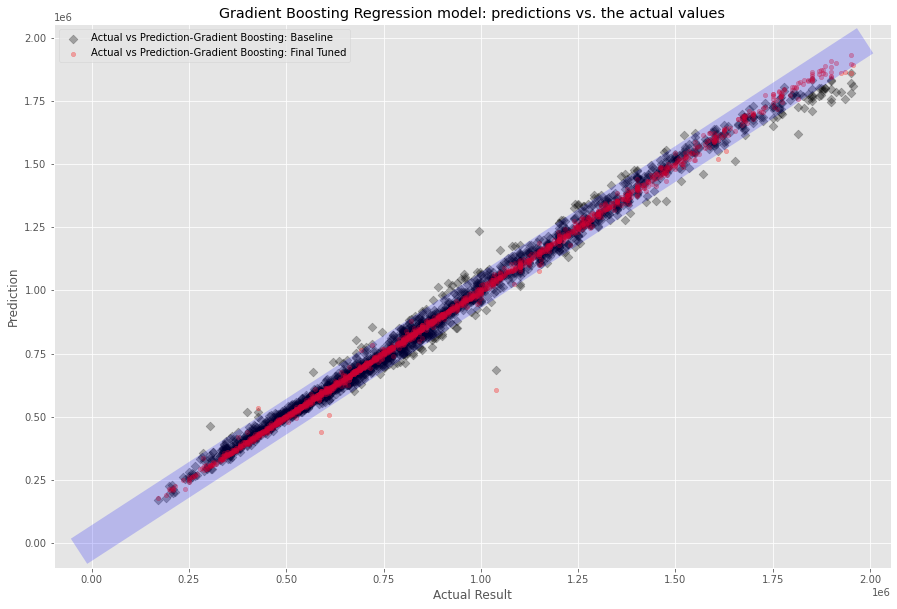

In [43]:
# Let's plot the predictions against the actual result. Use scatter()
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_gbr, color='black', marker='D', s=40, alpha=0.3, label='Actual vs Prediction-Gradient Boosting: Baseline')
plt.scatter(y_test,y_pred_gbr_cv_2, color='red', marker='o', s=20, alpha=0.3,label='Actual vs Prediction-Gradient Boosting: Final Tuned')
plt.title('Gradient Boosting Regression model: predictions vs. the actual values')
plt.plot([0,(np.max(y_test))],[0,(np.max(y_test))], 'blue', linewidth=30, alpha=0.2)
plt.legend()
plt.xlabel('Actual Result')
plt.ylabel('Prediction')

In [44]:
final_gbr = pd.DataFrame({'SalePrice_Actual': y_test, 'SalePrice_Predicted_baseline': y_pred_gbr.round(3), 'SalePrice_Predicted_Tuned': y_pred_gbr_cv_2.round(3)})
final_gbr.head(30).sort_values(by='SalePrice_Actual', ascending=False)

,SalePrice_Actual,SalePrice_Predicted_baseline,SalePrice_Predicted_Tuned
6219,1900000,1745026.199,1846860.669
696,1770000,1715486.894,1769772.362
2560,1600000,1630200.335,1608102.512
3249,1525000,1504801.109,1542965.379
1223,1478000,1483150.219,1455220.564
6756,1438000,1495139.900,1457911.474
1904,1375000,1427839.098,1362463.731
7028,1300000,1370606.119,1291563.021
6904,1216000,1153269.506,1210143.510
3982,1080000,1050589.661,1083288.839


## 10. Models next step:<a id='10_Models_next_step'></a>

Now, after building our 2nd Model: Decision Tree Regression, let's see if we can further improve our prediction using below algorithm:

 * XGBoost.
 

## 11. Saving our Data<a id='9_Saving_our_data'></a>
Finally, let's save our final DataFrame with the new features:


In [ ]:
# Saving df_final_v1:
df_final_v1.to_csv(path_or_buf = "path" + "/pre_processing_df.csv", index=False)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))